<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster/blob/main/lab_63_keras_embedding_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding with Keras.Embedding() Layer

- 정수 인덱스를 벡터로 매핑하는 딕셔너리 구조 (인덱스 크기, 벡터 크기)
- 학습 시키는 데이터에 따라 다른 임베딩이 만들어진다.

- IMDB 영화 리뷰 데이터를 사용한 임베딩 예제
  - IMDB: (internet movie database) the world's most popular and authoritative source for movie, TV and celebrity content



In [ ]:
import tensorflow as tf
import tensorflow.keras as keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import os, os.path
import zipfile
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 5000 개의 단어만 사용하고, 각 문장에서는 뒤에서부터 500 개의 단어만 사용하겠음.

In [ ]:
max_features = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
y_train[:1000].sum(), y_train[-1000:].sum()   # can assume equally distributed

(494, 498)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
print(y_train[6])
print(x_train[6])

1
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]


In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in x_train[6]])
print('---label---')
print(y_train[6])

1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'm

In [ ]:
# 각 문장이 몇개의 단어로 구성되어 있는지 확인
[len(x_train[i]) for i in range(10)]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [ ]:
print(max([len(x_train[i]) for i in range(25000)]), min([len(x_train[i]) for i in range(25000)]))
print(max([len(x_test[i]) for i in range(25000)]), min([len(x_test[i]) for i in range(25000)]))

2494 11
2315 7


In [ ]:
x_train[0:2]   # words tokenized and expressed by (word) numbers

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [ ]:
# 마지막 500개의 단어들만 사용한다. -> 500개보다 적으면 똑같은 길이로 만들어 준다.
maxlen = 500
x_train_p=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_p=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train_p.shape, x_test_p.shape)

(25000, 500) (25000, 500)


- Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.

In [ ]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=maxlen)) # input 각 단어에 대해 32-vector 로 임베딩
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
dense (Dense)                (None, 500, 1)            33        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train_p, y_train,
                    epochs=10, batch_size=500,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 4s 24ms/step - loss: 0.6921 - acc: 0.5174 - val_loss: 0.6908 - val_acc: 0.5225
Epoch 2/10
40/40 [==============================] - 1s 14ms/step - loss: 0.6899 - acc: 0.5225 - val_loss: 0.6894 - val_acc: 0.5229
Epoch 3/10
40/40 [==============================] - 1s 13ms/step - loss: 0.6888 - acc: 0.5247 - val_loss: 0.6886 - val_acc: 0.5229
Epoch 4/10
40/40 [==============================] - 1s 13ms/step - loss: 0.6881 - acc: 0.5193 - val_loss: 0.6882 - val_acc: 0.5210
Epoch 5/10
40/40 [==============================] - 1s 14ms/step - loss: 0.6878 - acc: 0.5197 - val_loss: 0.6881 - val_acc: 0.5230
Epoch 6/10
40/40 [==============================] - 1s 14ms/step - loss: 0.6876 - acc: 0.5223 - val_loss: 0.6879 - val_acc: 0.5233
Epoch 7/10
40/40 [==============================] - 1s 13ms/step - loss: 0.6875 - acc: 0.5221 - val_loss: 0.6879 - val_acc: 0.5231
Epoch 8/10
40/40 [==============================] - 1s 15ms/step - loss: 0.6875 - a

Text(0.5, 1.0, 'Training(--) and validation loss')

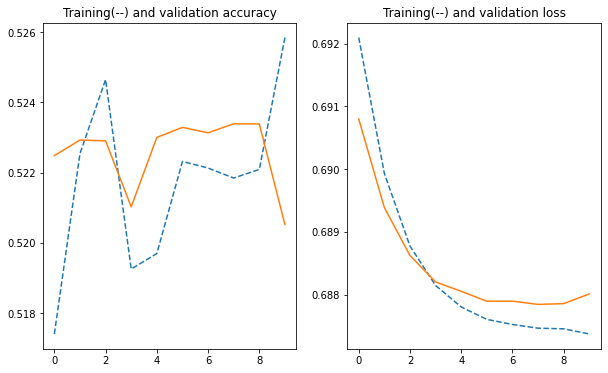

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.5212683081626892


- 위의 결과는 500 개의 단어만 고려한 것임. 
- 각 단어를 독립적으로 다루었으며, 문장의 구성 정보를 고려하지 않음
- 문장의 구조 정보를 고려하려면 임베딩 층 위에 합성곱이나 순환신경망 층을 추가한다

# CNN

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=maxlen))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 99, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 95, 128)           82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)           82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)              

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train_p, y_train,
                    epochs=10, batch_size=500,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 32s 100ms/step - loss: 0.6926 - acc: 0.5161 - val_loss: 0.6829 - val_acc: 0.6430
Epoch 2/10
40/40 [==============================] - 4s 94ms/step - loss: 0.4893 - acc: 0.7707 - val_loss: 0.3629 - val_acc: 0.8410
Epoch 3/10
40/40 [==============================] - 4s 93ms/step - loss: 0.2676 - acc: 0.8939 - val_loss: 0.3001 - val_acc: 0.8728
Epoch 4/10
40/40 [==============================] - 4s 93ms/step - loss: 0.2048 - acc: 0.9239 - val_loss: 0.3158 - val_acc: 0.8704
Epoch 5/10
40/40 [==============================] - 4s 93ms/step - loss: 0.1696 - acc: 0.9398 - val_loss: 0.3370 - val_acc: 0.8718
Epoch 6/10
40/40 [==============================] - 4s 94ms/step - loss: 0.1377 - acc: 0.9548 - val_loss: 0.3712 - val_acc: 0.8690
Epoch 7/10
40/40 [==============================] - 4s 93ms/step - loss: 0.1044 - acc: 0.9685 - val_loss: 0.4272 - val_acc: 0.8684
Epoch 8/10
40/40 [==============================] - 4s 92ms/step - loss: 0.0791 -

Text(0.5, 1.0, 'Training(--) and validation loss')

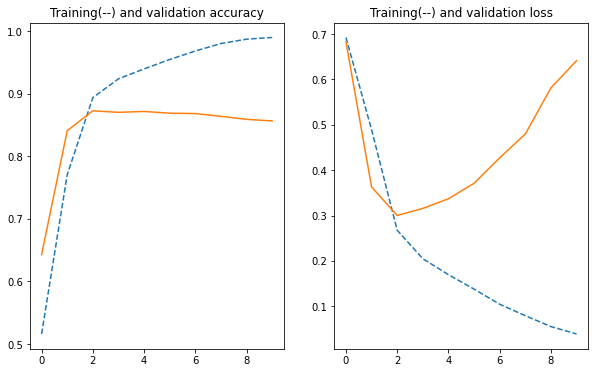

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8468400239944458


In [ ]:
# prediction
model.predict(x_test_p[0:5])

array([[0.01140796],
       [1.        ],
       [0.01504931],
       [0.99508154],
       [0.9993716 ]], dtype=float32)

In [ ]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1])

# GRU RNN 추가

In [ ]:
x_train_p.shape

(25000, 500)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=maxlen))
model.add(GRU(32))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 167,425
Trainable params: 167,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time history = model.fit(x_train_p, y_train, epochs=10, batch_size=500, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 7s 119ms/step - loss: 0.6895 - acc: 0.5496 - val_loss: 0.6779 - val_acc: 0.5946
Epoch 2/10
40/40 [==============================] - 4s 96ms/step - loss: 0.5782 - acc: 0.7225 - val_loss: 0.4518 - val_acc: 0.7894
Epoch 3/10
40/40 [==============================] - 3s 87ms/step - loss: 0.3487 - acc: 0.8601 - val_loss: 0.3270 - val_acc: 0.8642
Epoch 4/10
40/40 [==============================] - 3s 87ms/step - loss: 0.2672 - acc: 0.9005 - val_loss: 0.3191 - val_acc: 0.8704
Epoch 5/10
40/40 [==============================] - 4s 88ms/step - loss: 0.2184 - acc: 0.9229 - val_loss: 0.3164 - val_acc: 0.8746
Epoch 6/10
40/40 [==============================] - 4s 89ms/step - loss: 0.1910 - acc: 0.9370 - val_loss: 0.3436 - val_acc: 0.8718
Epoch 7/10
40/40 [==============================] - 4s 90ms/step - loss: 0.1766 - acc: 0.9412 - val_loss: 0.3536 - val_acc: 0.8716
Epoch 8/10
40/40 [==============================] - 4s 90ms/step - loss: 0.1613 - 

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8508399724960327


Text(0.5, 1.0, 'Training(--) and validation loss')

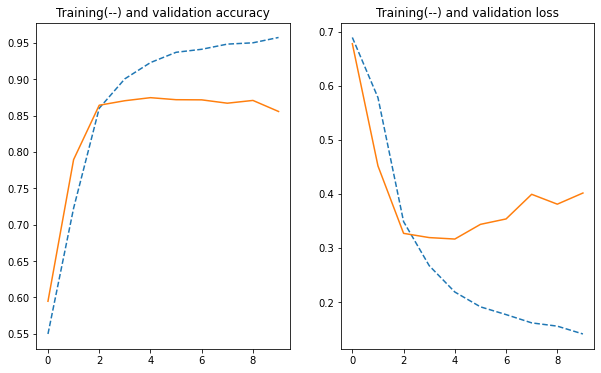

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [ ]:
# prediction
model.predict(x_test_p[0:5])

array([[0.10247534],
       [0.99399143],
       [0.79613024],
       [0.06128439],
       [0.99852765]], dtype=float32)

In [ ]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1])

- y_test[2] 는 무슨 문장일까?

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print([id2word.get(i, ' ') for i in x_test[2]])
print(y_test[2])

['the', 'plot', 'near', 'ears', 'recent', 'and', 'and', 'of', 'him', 'flicks', 'frank', 'br', 'by', 'excellent', 'and', 'br', 'of', 'past', 'and', 'near', 'really', 'all', 'and', 'family', 'four', 'and', 'to', 'movie', 'that', 'obvious', 'family', 'brave', 'movie', 'is', 'got', 'say', 'and', 'with', 'up', 'comment', 'this', 'and', 'been', 'of', 'entertaining', 'not', 'be', 'and', 'james', 'in', 'you', 'seen', 'and', 'and', 'portrayed', 'dirty', 'in', 'so', 'washington', 'and', 'this', 'you', 'minutes', 'no', 'all', 'station', 'all', 'after', 'and', 'promising', 'who', 'and', 'and', 'and', 'to', 'and', 'any', 'by', 'speed', 'they', 'is', 'my', 'as', 'screams', 'dirty', 'in', 'of', 'full', 'br', 'pacino', 'dignity', 'need', 'men', 'of', 'and', 'popular', 'really', 'all', 'way', 'this', 'and', 'this', 'and', 'they', 'is', 'my', 'no', 'standard', 'certainly', 'near', 'br', 'an', 'beach', 'with', 'this', 'make', 'and', 'i', 'i', 'of', 'fails', 'and', 'br', 'of', 'finished', 'wear', 'psycho'

# Combine CNN and RNN together

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=maxlen))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 496, 64)           10304     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 124, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 56        
Total params: 196,760
Trainable params: 196,760
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
%time history = model.fit(x_train_p, y_train, epochs=10, batch_size=500, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 6s 92ms/step - loss: 0.6776 - acc: 0.5889 - val_loss: 0.5382 - val_acc: 0.7404
Epoch 2/10
40/40 [==============================] - 3s 77ms/step - loss: 0.4733 - acc: 0.7890 - val_loss: 0.3462 - val_acc: 0.8626
Epoch 3/10
40/40 [==============================] - 3s 77ms/step - loss: 0.2900 - acc: 0.8811 - val_loss: 0.2923 - val_acc: 0.8836
Epoch 4/10
40/40 [==============================] - 3s 74ms/step - loss: 0.2390 - acc: 0.9055 - val_loss: 0.2928 - val_acc: 0.8806
Epoch 5/10
40/40 [==============================] - 3s 74ms/step - loss: 0.2106 - acc: 0.9209 - val_loss: 0.2769 - val_acc: 0.8888
Epoch 6/10
40/40 [==============================] - 3s 75ms/step - loss: 0.1958 - acc: 0.9234 - val_loss: 0.2884 - val_acc: 0.8834
Epoch 7/10
40/40 [==============================] - 3s 78ms/step - loss: 0.1744 - acc: 0.9356 - val_loss: 0.2784 - val_acc: 0.8872
Epoch 8/10
40/40 [==============================] - 3s 75ms/step - loss: 0.1669 - a

In [ ]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8737599849700928


Text(0.5, 1.0, 'Training(--) and validation loss')

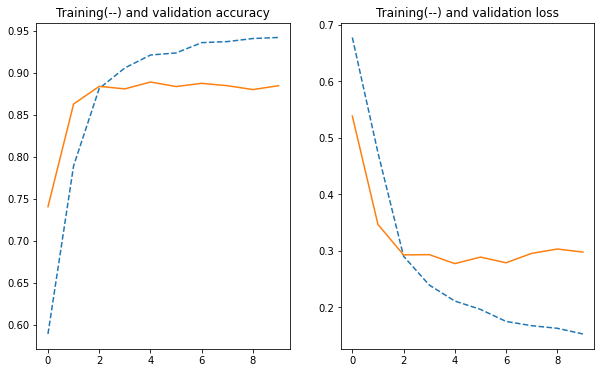

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

# Exercise (연습)
- By default, if a GPU is available, the embedding matrix will be placed on the GPU. This achieves the best performance.
- in order to use CPU (too big to fit on GPU), you should use CPU
  - with tf.device('cpu:0'): 
  -embedding_layer = Embedding(...)
  - embedding_layer.build()

In [ ]:
import tensorflow as tf
# 문장 토큰화와 단어 토큰화
text=[['Hope', 'to', 'see', 'you', 'soon'],
      ['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다. (훈련 없이 모양만 보기 위함)
embedding_layer = Embedding(7, 2, input_length=5)
result = embedding_layer(tf.constant([0, 1, 2, 3, 4, 5, 6]))
print(result.numpy())

# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다. 아래와 같은 형태가 됨.


[[ 0.00812409  0.01459432]
 [ 0.00184902 -0.02500283]
 [-0.04473765 -0.02987905]
 [ 0.04027107 -0.032742  ]
 [-0.03263779 -0.00193424]
 [ 0.04083664  0.01036142]
 [ 0.01781512 -0.00375516]]


In [ ]:
model = Sequential()
model.add(Embedding(7, 2, input_length=5))
model.add(Flatten())
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 5, 2)              14        
_________________________________________________________________
flatten (Flatten)            (None, 10)                0         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(7, 2, input_length=5)) # need input_length to be connected to Flatten then Dense layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 5, 2)              14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
